In [1428]:
#CREDIT CARD SPEND PREDICTION

In [1429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,f1_score,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost
import itertools
%matplotlib inline

In [1430]:
#Importing dataset as "data"
data=pd.read_csv("CREDIT CARD USERS DATA.csv")
data.head()

C:\Users\Hardik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1431]:
#Importing Data Dictionary as "dictionary"
dictionary=pd.read_excel("CREDIT CARD USERS DATA.xlsx","Data Dictionary")

In [1432]:
#Defining Categorical Variables as "catvars"
catvars=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']

In [1433]:
data[catvars].head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,September,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,May,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,June,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,July,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1434]:
#Replacing the #NULL! values with NaN values
for i in data.columns:
    data[i]=data[i].replace('#NULL!',np.nan)

In [1435]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [1437]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.0,2.00,3.00,4.0000,5.00
gender,5000.0,0.503600,0.500037,0.0,0.00,1.00,1.0000,1.00
age,5000.0,47.025600,17.770338,18.0,31.00,47.00,62.0000,79.00
agecat,5000.0,4.238800,1.308785,2.0,3.00,4.00,5.0000,6.00
ed,5000.0,14.543000,3.281083,6.0,12.00,14.00,17.0000,23.00
edcat,5000.0,2.672000,1.211738,1.0,2.00,2.00,4.0000,5.00
jobcat,5000.0,2.752800,1.737900,1.0,1.00,2.00,4.0000,6.00
union,5000.0,0.151200,0.358280,0.0,0.00,0.00,0.0000,1.00
employ,5000.0,9.730400,9.690929,0.0,2.00,7.00,15.0000,52.00
empcat,5000.0,2.932600,1.453300,1.0,2.00,3.00,4.0000,5.00


In [1438]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

lnwireten         3656
lnwiremon         3656
lnequipmon        3296
lnequipten        3296
lntollten         2622
lntollmon         2622
lncardten         1422
lncardmon         1419
lnlongten            3
longten              3
townsize             2
commutetime          2
cardten              2
lnothdebt            1
lncreddebt           1
commutebike          0
pets_freshfish       0
homeown              0
pets_saltfish        0
pets_small           0
commutewalk          0
hometype             0
pets_reptiles        0
address              0
commuterail          0
addresscat           0
commutebus           0
cars                 0
pets_birds           0
carown               0
                  ... 
equip                0
tollten              0
card2fee             0
polparty             0
polcontrib           0
vote                 0
response_02          0
cardtype             0
cardbenefit          0
cardfee              0
cardtenure           0
cardtenurecat        0
card2      

In [1439]:
#Removing columns with containing major percentage of values missing
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True)

In [1440]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

lncardten            1422
lncardmon            1419
lnlongten               3
longten                 3
commutetime             2
cardten                 2
townsize                2
lnothdebt               1
lncreddebt              1
pets_freshfish          0
homeown                 0
pets_saltfish           0
carown                  0
pets_small              0
hometype                0
address                 0
addresscat              0
cars                    0
response_03             0
cartype                 0
pets_reptiles           0
carcatvalue             0
carbought               0
carbuy                  0
commute                 0
commutecat              0
commutecar              0
commutemotorcycle       0
commutecarpool          0
commutebus              0
                     ... 
equip                   0
tollten                 0
card2fee                0
response_02             0
polcontrib              0
vote                    0
card                    0
cardtype    

In [1441]:
#Treating missing values by replacing them with mean
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(data[['lncardten']])
data['lncardten'] = mean.transform(data[['lncardten']])

In [1442]:
mean = Imputer(missing_values = 'NaN', strategy='mean')
mean.fit(data[['lncardmon']])
data['lncardmon'] = mean.transform(data[['lncardmon']])

In [1443]:
data = data.dropna(how='any')

In [1444]:
#Counting the number of NULL values
data.isnull().sum().sort_values(ascending=False)

response_03          0
carbuy               0
pets_small           0
pets_saltfish        0
pets_freshfish       0
homeown              0
hometype             0
address              0
addresscat           0
cars                 0
carown               0
cartype              0
carvalue             0
carcatvalue          0
carbought            0
commute              0
pets_birds           0
commutecat           0
commutetime          0
commutecar           0
commutemotorcycle    0
commutecarpool       0
commutebus           0
commuterail          0
commutepublic        0
commutebike          0
commutewalk          0
commutenonmotor      0
telecommute          0
reason               0
                    ..
equipmon             0
equip                0
card                 0
cardtype             0
cardbenefit          0
cardfee              0
cardtenure           0
cardtenurecat        0
card2                0
card2type            0
card2benefit         0
card2fee             0
card2tenure

In [1445]:
data.index=data.custid
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0648-AIPJSP-UVM,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8158-SMTQFB-CNO,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [1446]:
data.drop(columns={'custid'},axis=1,inplace=True)

In [1447]:
#Extracting our required variable
reqvar=data['cardspent']+data['card2spent']
reqvar=reqvar.rename("reqvar")
data=data.join(reqvar)
data.drop(columns={'cardspent','card2spent'},inplace=True)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


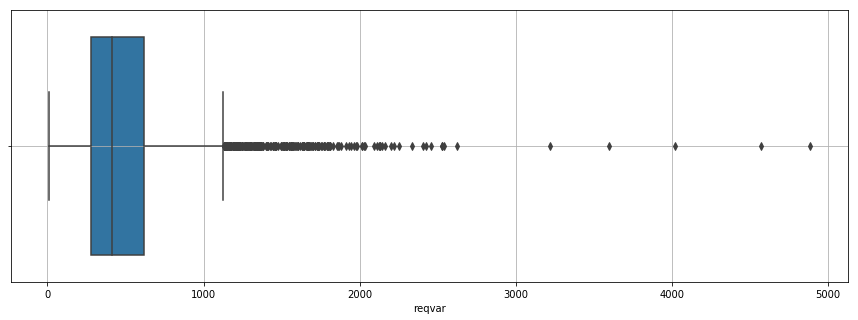

In [1448]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


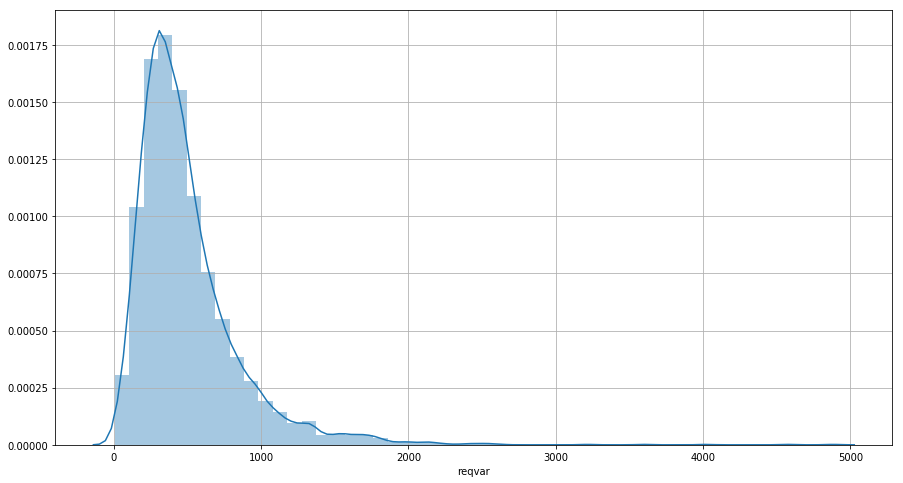

In [1449]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [1450]:
data['reqvar']=np.log(data['reqvar'])

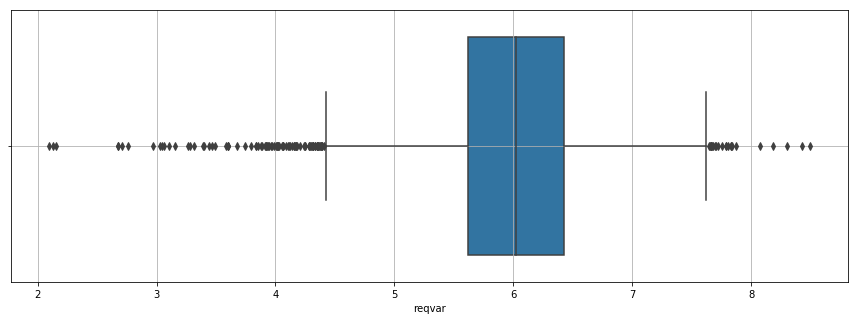

In [1451]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


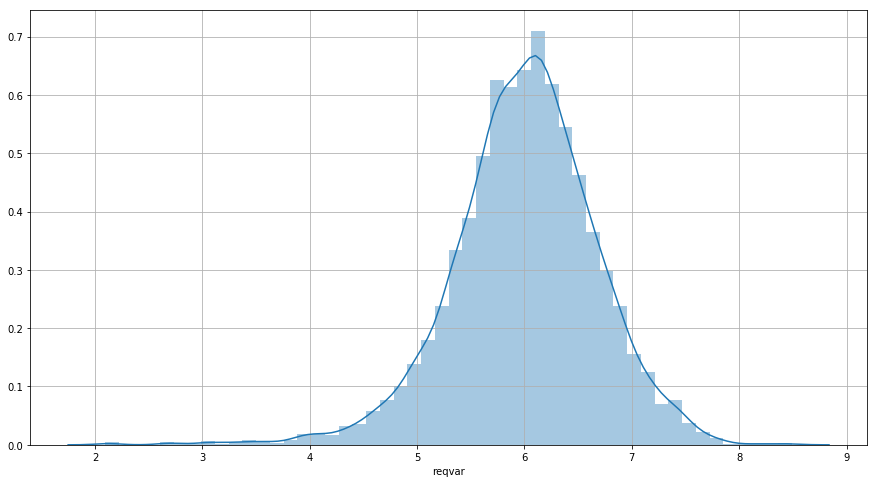

In [1452]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [1453]:
numvars=data.drop(columns=catvars,axis=1)
numvars.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,15.0,31.0,3.43,11.1,1.20,0.18,2.24,0.81,-1.0,...,29.50,126.1,14.25,2.66,60.00,4.09,0.00,0.00,13.0,5.007029
0648-AIPJSP-UVM,22.0,17.0,15.0,2.71,18.6,1.22,0.20,1.57,0.45,-1.0,...,54.85,1975.0,16.00,2.77,610.00,6.41,45.65,1683.55,18.0,4.350794
5195-TLUDJE-HVO,67.0,14.0,35.0,3.56,9.9,0.93,-0.07,2.54,0.93,13.0,...,0.00,0.0,23.00,3.14,1410.00,7.25,0.00,0.00,21.0,5.886021
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,-3.78,1.12,0.11,18.0,...,0.00,0.0,21.00,3.04,685.00,6.53,0.00,0.00,26.0,5.884464
8158-SMTQFB-CNO,26.0,16.0,23.0,3.14,1.7,0.21,-1.54,0.18,-1.74,13.0,...,0.00,0.0,17.25,2.85,360.00,5.89,19.05,410.80,27.0,6.230147


In [1454]:
q1=numvars.quantile(0.25)
q3=numvars.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [1455]:
nums=list()
for i in numvars.columns:
    if i in lower.index:
        nums.append(i)

In [1456]:
numvars=numvars[nums]

In [1457]:
df=numvars[~((numvars<(q1-1.5 *x)) | (numvars>(q3+1.5*x))).any(axis=1)]
df.head()

,age,ed,income,lninc,debtinc,creddebt,othdebt,spoused,reside,pets,...,tollten,equipmon,equipten,cardmon,lncardmon,lncardten,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,1.12,18.0,5.0,0.0,...,0.0,0.0,0.0,21.0,3.040000,6.530000,0.0,0.0,26.0,5.884464
9124-DZALHM-S6I,66.0,12.0,16.0,2.77,2.6,0.10,0.31,-1.0,1.0,1.0,...,0.0,0.0,0.0,15.5,2.740000,6.720000,0.0,0.0,25.0,6.148105
3512-MUWBGY-52X,47.0,11.0,84.0,4.43,4.1,1.77,1.67,-1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,2.909609,6.426193,0.0,0.0,21.0,5.739182
8241-PWPONH-62O,33.0,8.0,19.0,2.94,0.9,0.13,0.04,9.0,5.0,6.0,...,0.0,0.0,0.0,0.0,2.909609,6.426193,0.0,0.0,27.0,5.974903
1705-NMIQNO-IC4,58.0,18.0,63.0,4.14,10.5,1.92,4.69,-1.0,1.0,0.0,...,1776.7,0.0,0.0,24.5,3.200000,7.250000,0.0,0.0,21.0,6.885959


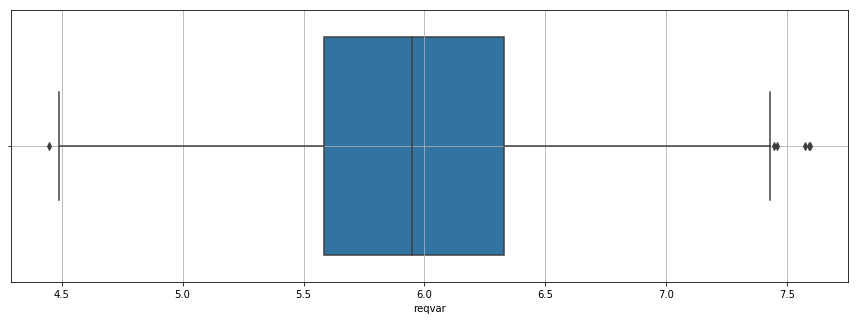

In [1458]:
#Post the treatment of outlier and log transform
plt.subplots(figsize=(15,5))
sns.boxplot(df['reqvar'])
plt.grid()
plt.show()

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


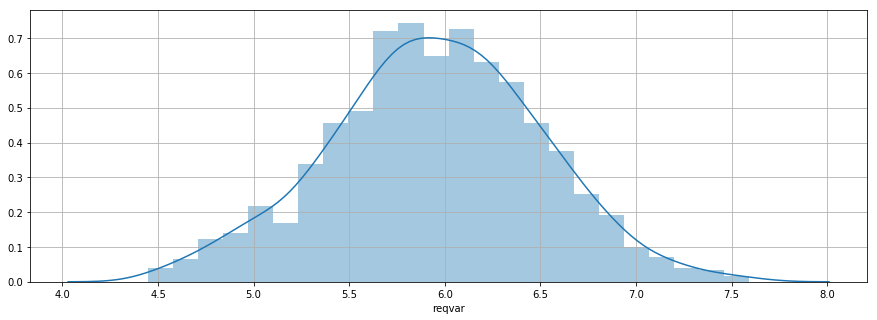

In [1459]:
plt.subplots(figsize=(15,5))
sns.distplot(df['reqvar'])
plt.grid()
plt.show()

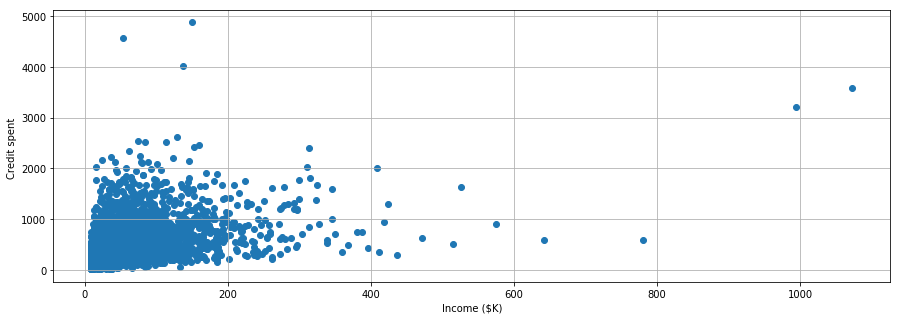

In [1460]:
plt.subplots(figsize=(15,5))
plt.scatter(data['income'],reqvar)
plt.xlabel('Income ($K)')
plt.ylabel('Credit spent ')
plt.grid()
plt.show()

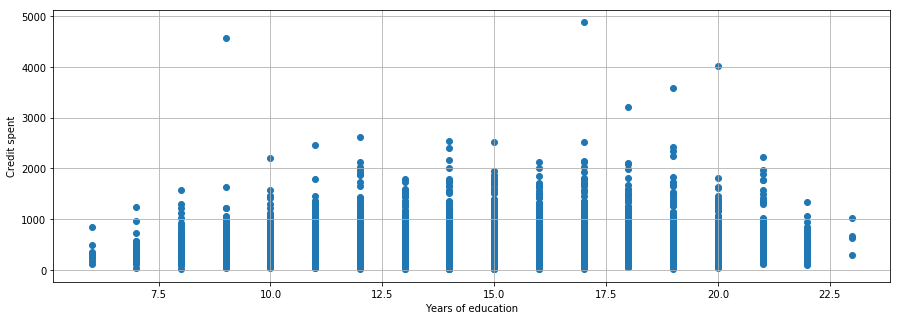

In [1461]:
plt.subplots(figsize=(15,5))
plt.scatter(data['ed'],reqvar)
plt.grid()
plt.xlabel('Years of education')
plt.ylabel('Credit spent')
plt.show()

In [1462]:
data['jobcat'].value_counts()

2.0    1638
1.0    1388
6.0     686
3.0     619
5.0     451
4.0     212
Name: jobcat, dtype: int64

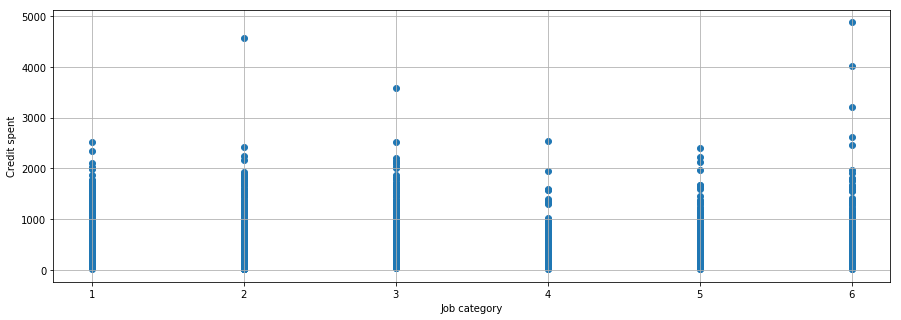

In [1463]:
plt.subplots(figsize=(15,5))
plt.scatter(data['jobcat'],reqvar)
plt.xlabel('Job category')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

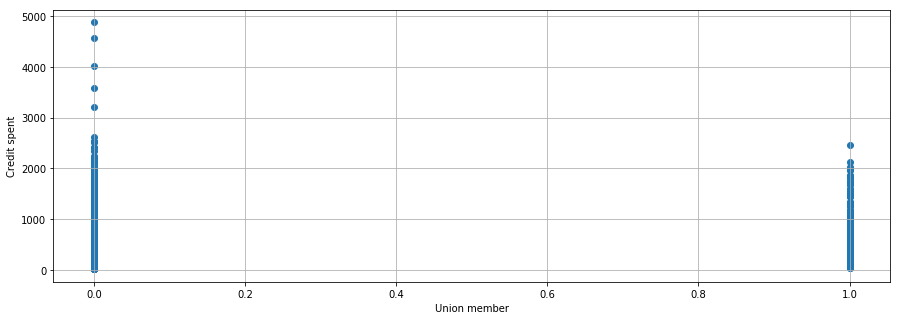

In [1464]:
plt.subplots(figsize=(15,5))
plt.scatter(data['union'],reqvar)
plt.xlabel('Union member')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

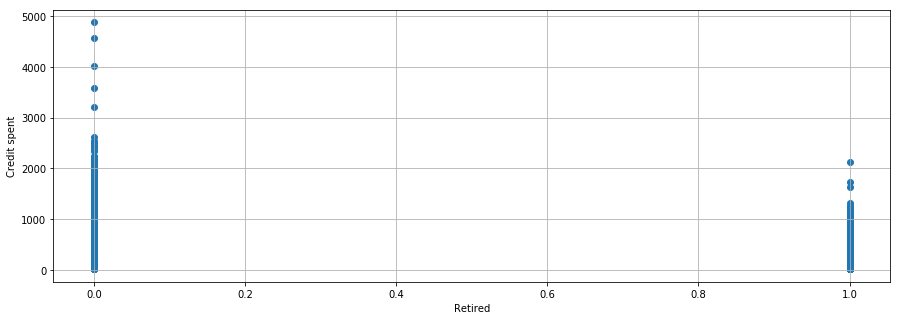

In [1465]:
plt.subplots(figsize=(15,5))
plt.scatter(data['retire'],reqvar)
plt.xlabel('Retired')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

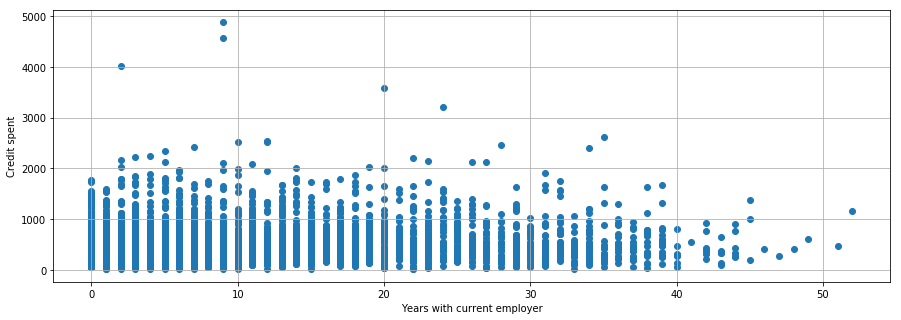

In [1466]:
plt.subplots(figsize=(15,5))
plt.scatter(data['employ'],reqvar)
plt.xlabel('Years with current employer')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

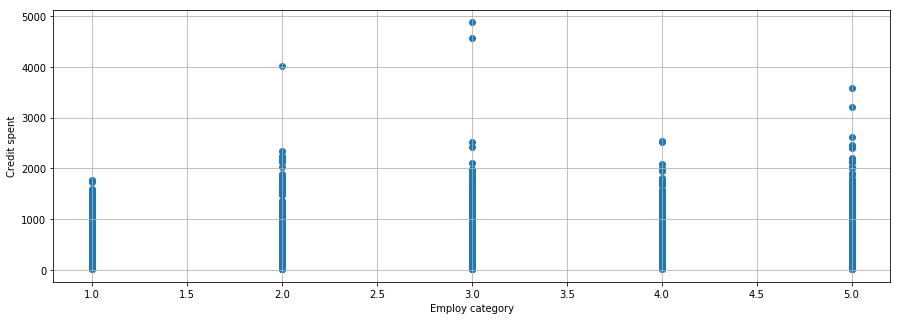

In [1467]:
plt.subplots(figsize=(15,5))
plt.scatter(data['empcat'],reqvar)
plt.xlabel('Employ category')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

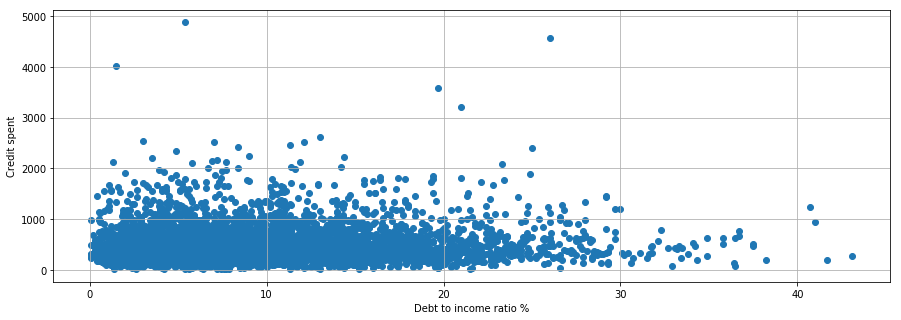

In [1468]:
plt.subplots(figsize=(15,5))
plt.scatter(data['debtinc'],reqvar)
plt.xlabel('Debt to income ratio %')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

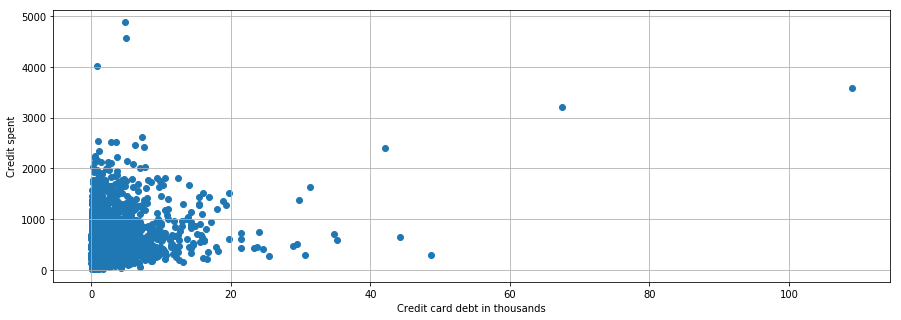

In [1469]:
plt.subplots(figsize=(15,5))
plt.scatter(data['creddebt'],reqvar)
plt.xlabel('Credit card debt in thousands')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

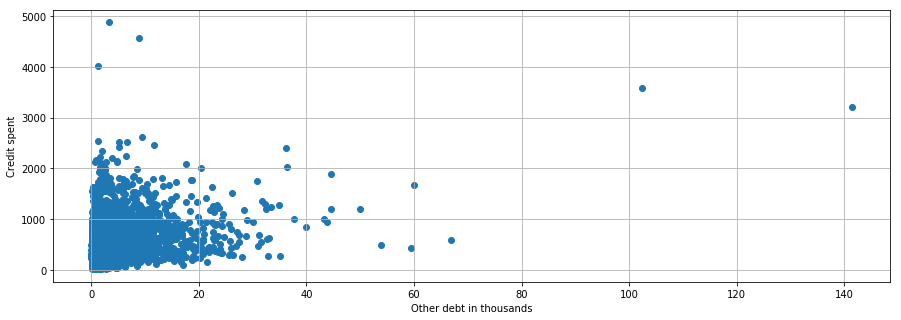

In [1470]:
plt.subplots(figsize=(15,5))
plt.scatter(data['othdebt'],reqvar)
plt.xlabel('Other debt in thousands')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

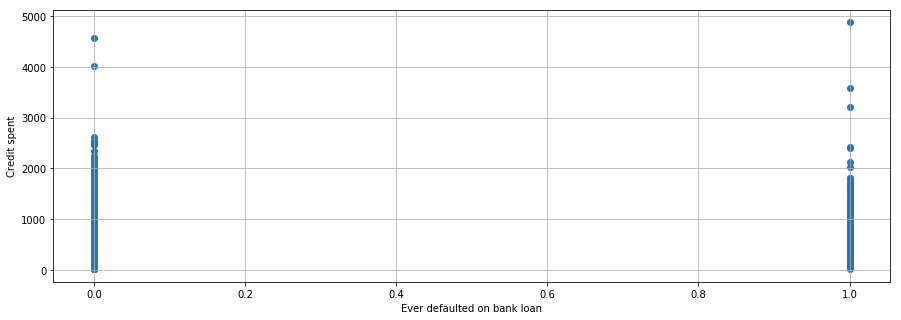

In [1471]:
plt.subplots(figsize=(15,5))
plt.scatter(data['default'],reqvar)
plt.xlabel('Ever defaulted on bank loan')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

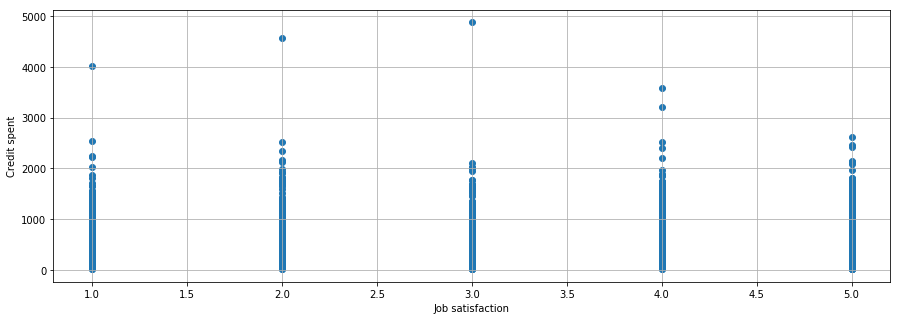

In [1472]:
plt.subplots(figsize=(15,5))
plt.scatter(data['jobsat'],reqvar)
plt.xlabel('Job satisfaction')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

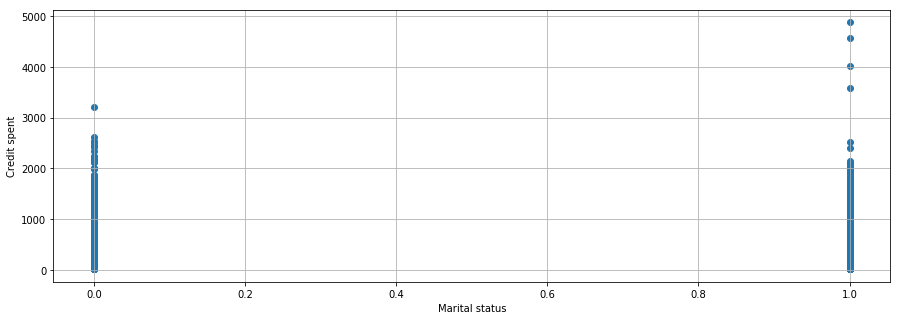

In [1473]:
plt.subplots(figsize=(15,5))
plt.scatter(data['marital'],reqvar)
plt.xlabel('Marital status')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

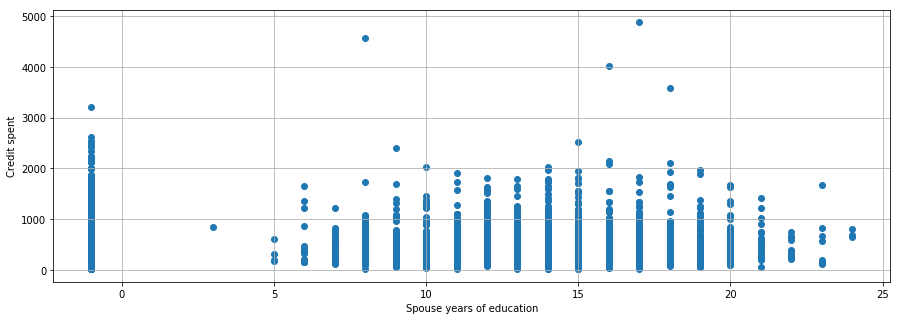

In [1474]:
plt.subplots(figsize=(15,5))
plt.scatter(data['spoused'],reqvar)
plt.xlabel('Spouse years of education')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

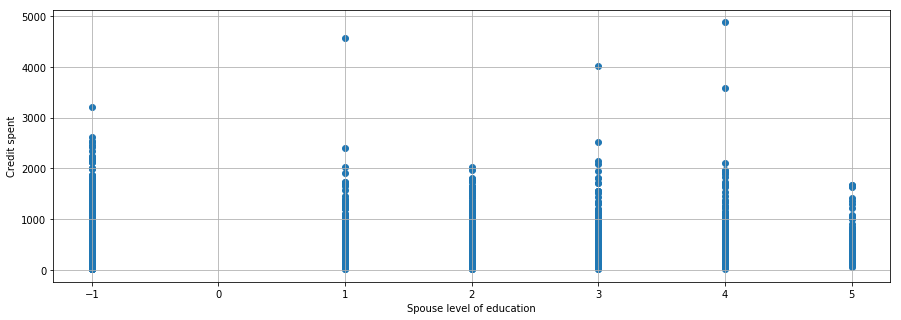

In [1475]:
plt.subplots(figsize=(15,5))
plt.scatter(data['spousedcat'],reqvar)
plt.xlabel('Spouse level of education')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

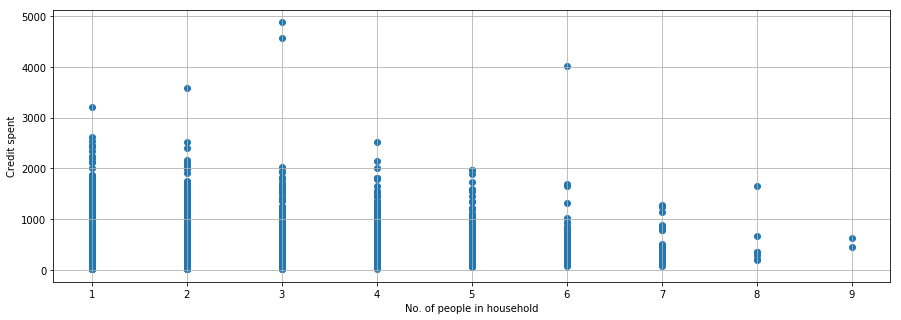

In [1476]:
plt.subplots(figsize=(15,5))
plt.scatter(data['reside'],reqvar)
plt.xlabel('No. of people in household')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

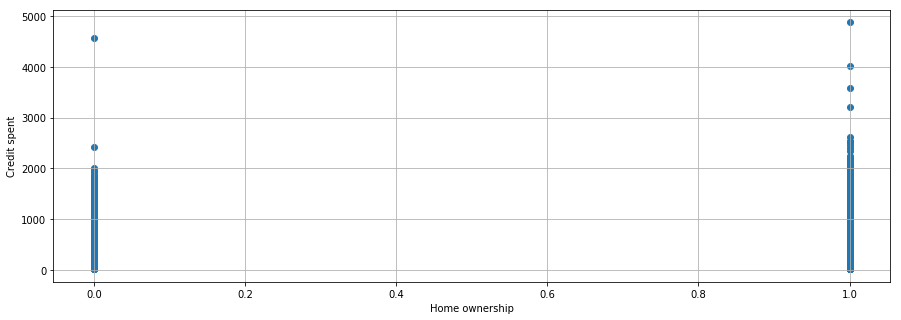

In [1477]:
plt.subplots(figsize=(15,5))
plt.scatter(data['homeown'],reqvar)
plt.xlabel('Home ownership')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

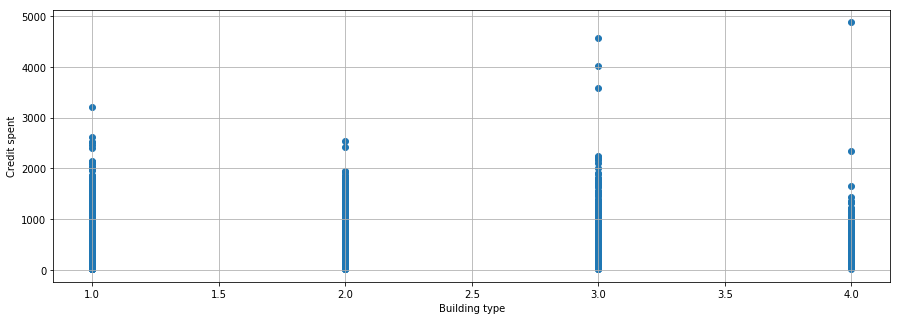

In [1478]:
plt.subplots(figsize=(15,5))
plt.scatter(data['hometype'],reqvar)
plt.xlabel('Building type')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

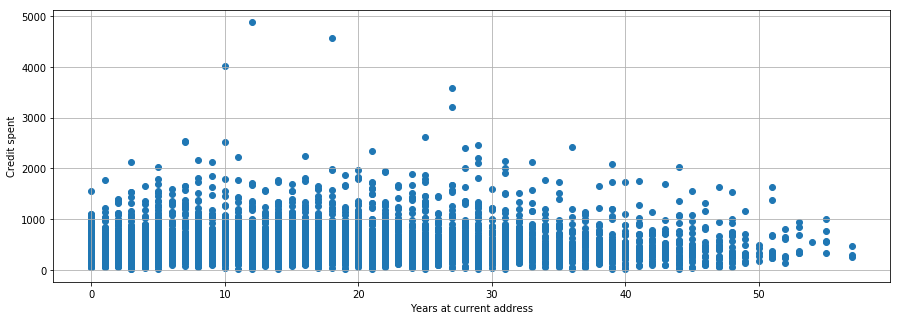

In [1479]:
plt.subplots(figsize=(15,5))
plt.scatter(data['address'],reqvar)
plt.xlabel('Years at current address')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

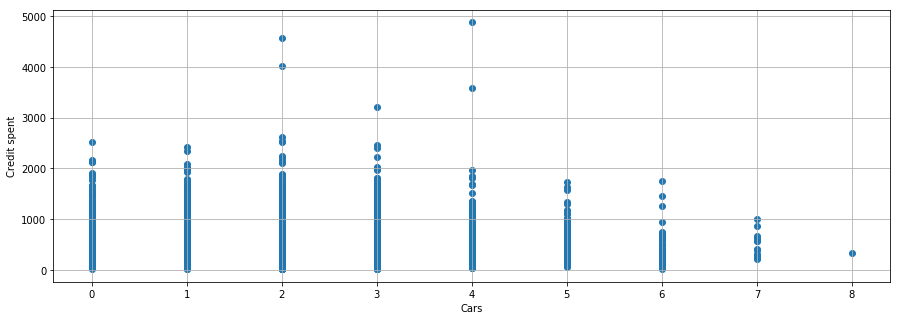

In [1480]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cars'],reqvar)
plt.xlabel('Cars')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

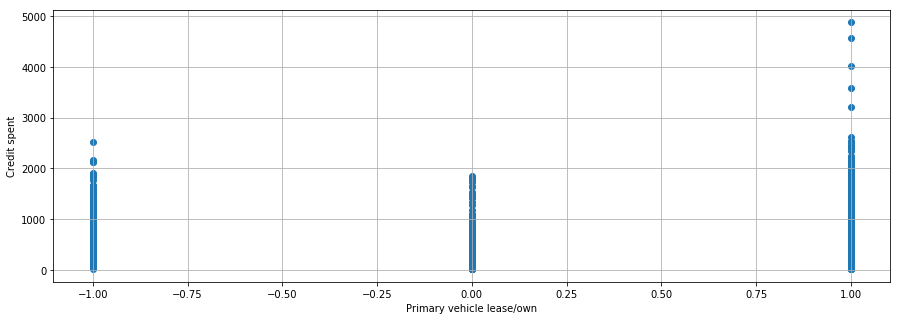

In [1481]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carown'],reqvar)
plt.xlabel('Primary vehicle lease/own')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

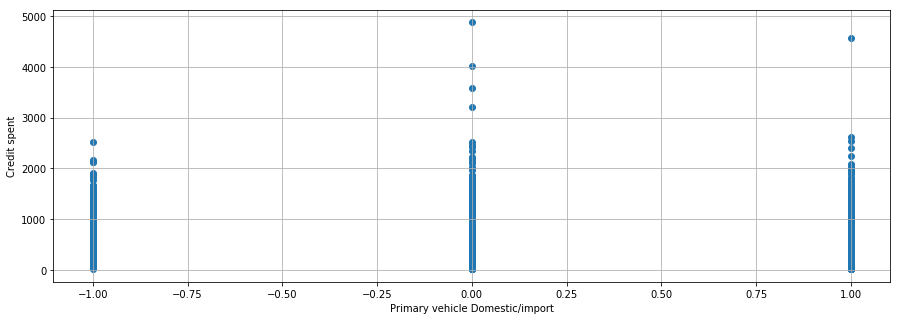

In [1482]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cartype'],reqvar)
plt.xlabel('Primary vehicle Domestic/import')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

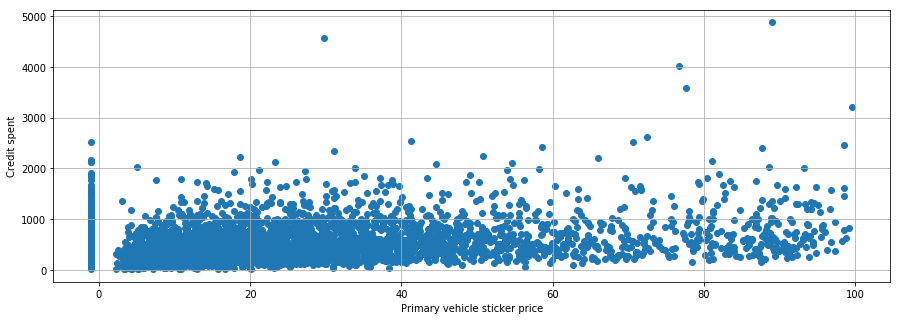

In [1483]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carvalue'],reqvar)
plt.xlabel('Primary vehicle sticker price')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

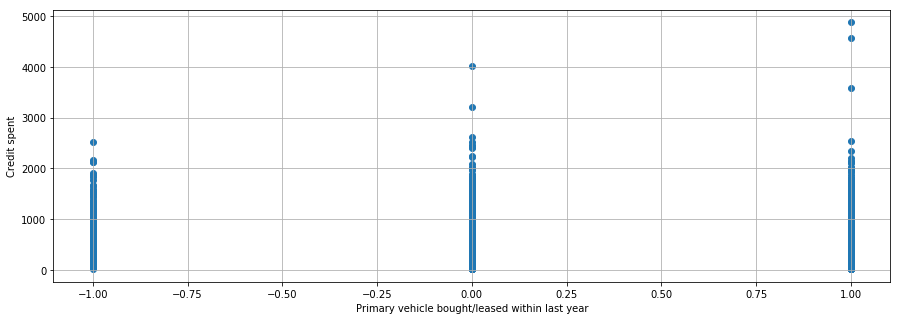

In [1484]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carbought'],reqvar)
plt.xlabel('Primary vehicle bought/leased within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

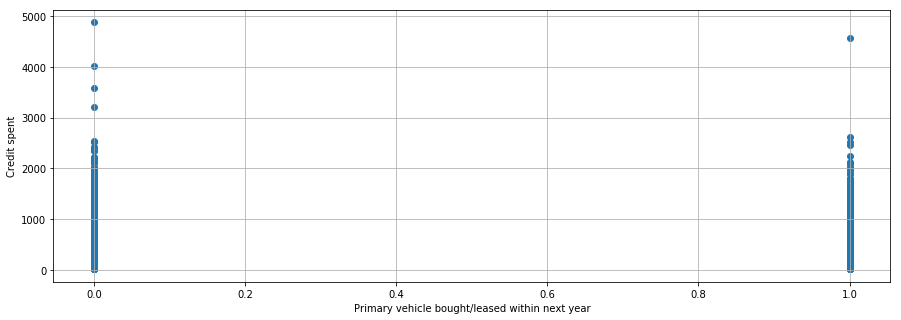

In [1485]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carbuy'],reqvar)
plt.xlabel('Primary vehicle bought/leased within next year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

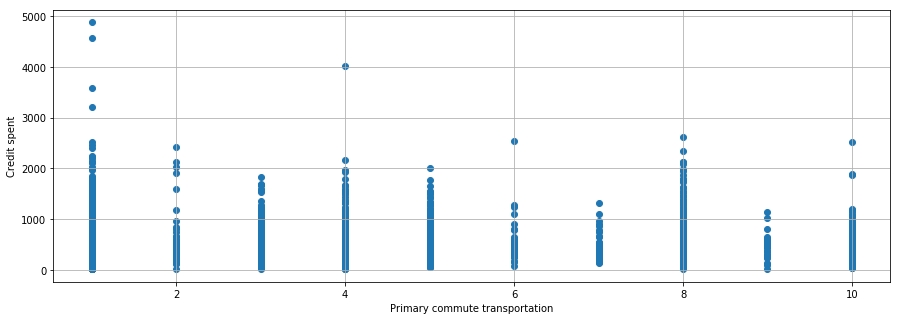

In [1486]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commute'],reqvar)
plt.xlabel('Primary commute transportation')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

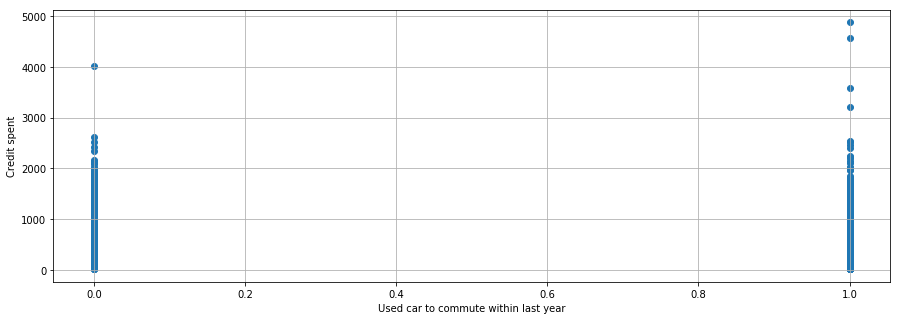

In [1487]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutecar'],reqvar)
plt.xlabel('Used car to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

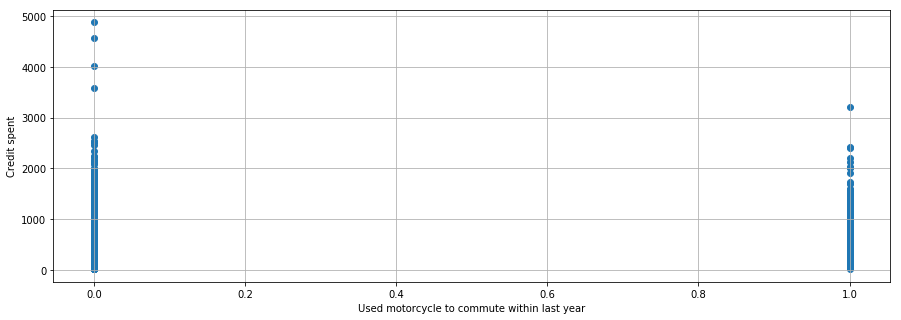

In [1488]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutemotorcycle'],reqvar)
plt.xlabel('Used motorcycle to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

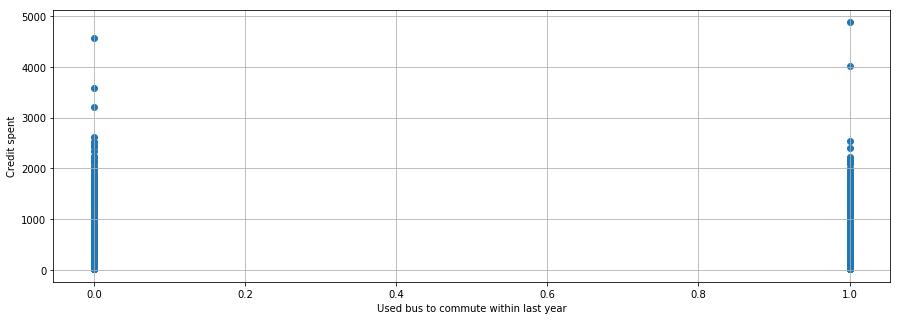

In [1489]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutebus'],reqvar)
plt.xlabel('Used bus to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

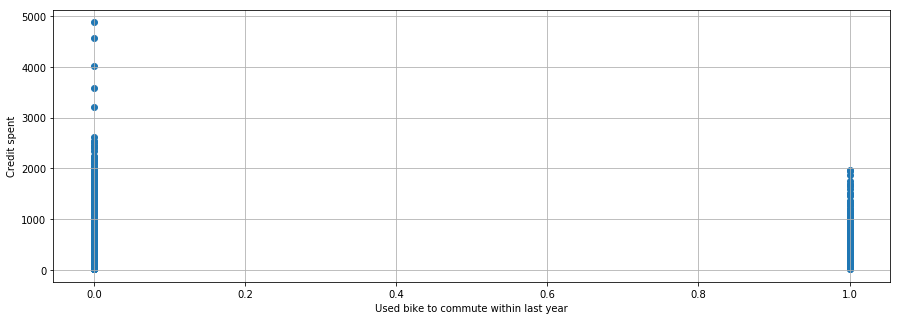

In [1490]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutebike'],reqvar)
plt.xlabel('Used bike to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

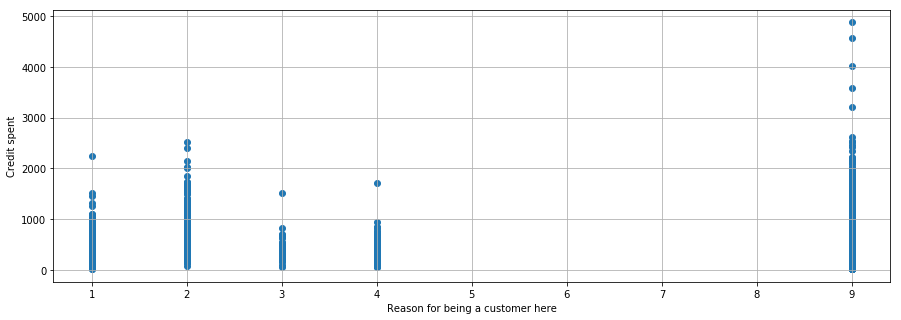

In [1491]:
plt.subplots(figsize=(15,5))
plt.scatter(data['reason'],reqvar)
plt.xlabel('Reason for being a customer here')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

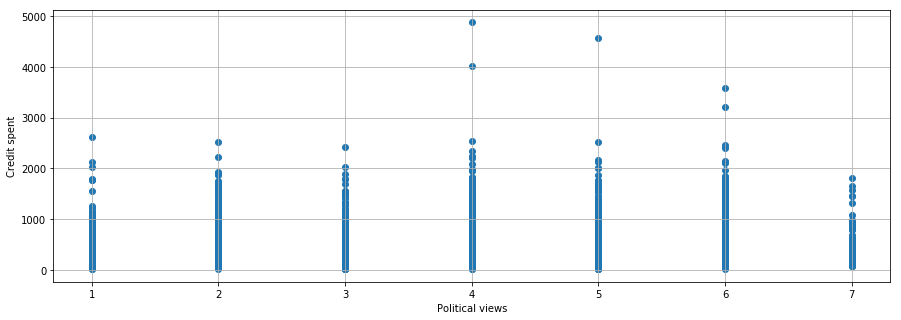

In [1492]:
plt.subplots(figsize=(15,5))
plt.scatter(data['polview'],reqvar)
plt.xlabel('Political views')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

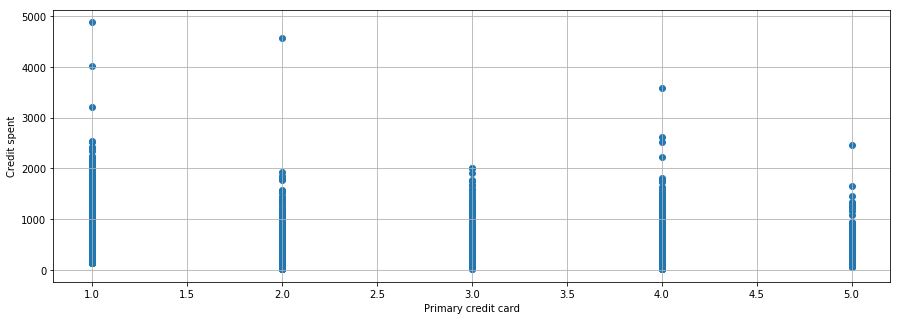

In [1493]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card'],reqvar)
plt.xlabel('Primary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

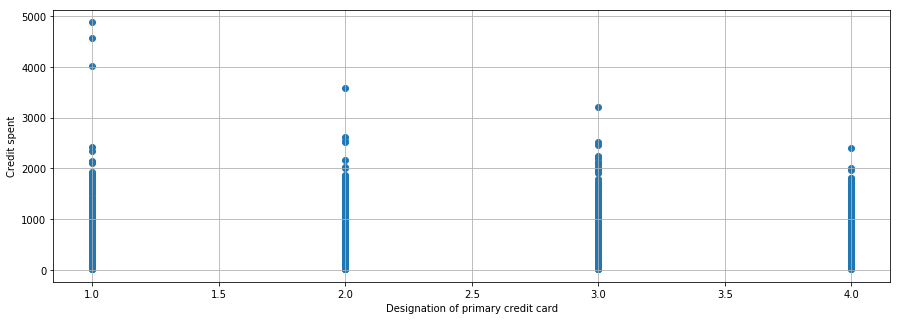

In [1494]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardtype'],reqvar)
plt.xlabel('Designation of primary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

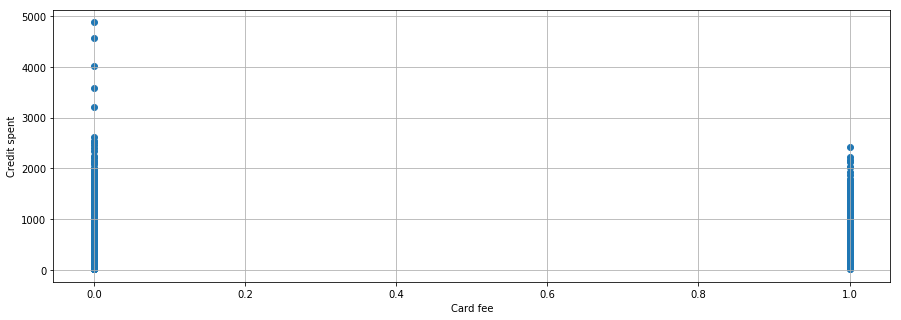

In [1495]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardfee'],reqvar)
plt.xlabel('Card fee')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

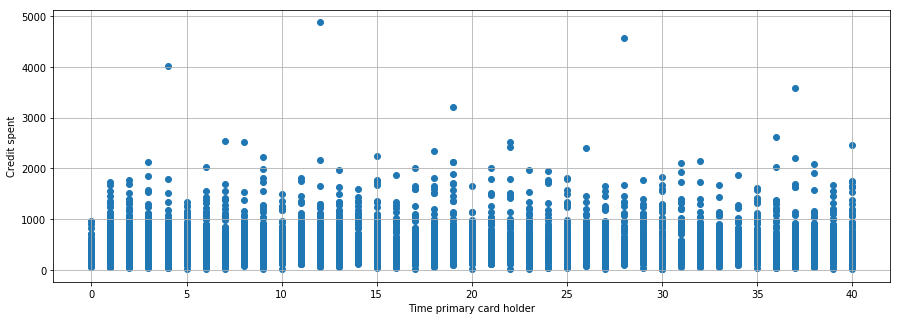

In [1496]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardtenure'],reqvar)
plt.xlabel('Time primary card holder')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

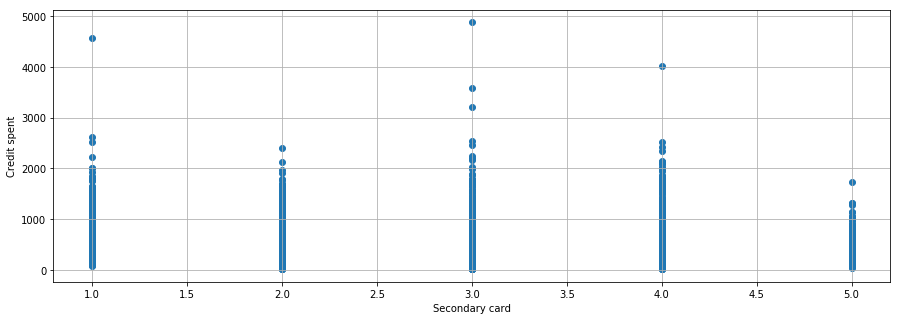

In [1497]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2'],reqvar)
plt.xlabel('Secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

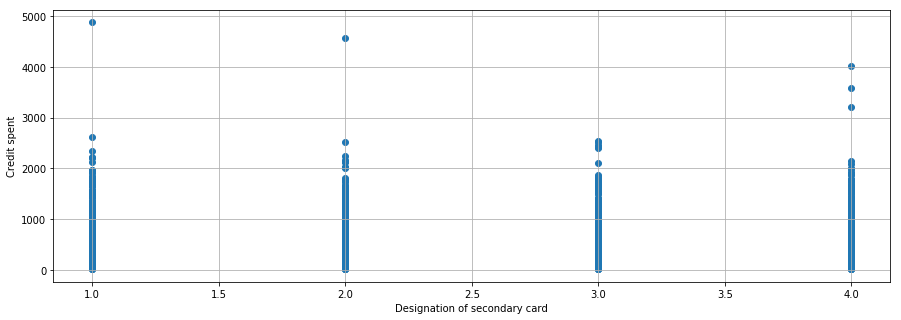

In [1498]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2type'],reqvar)
plt.xlabel('Designation of secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

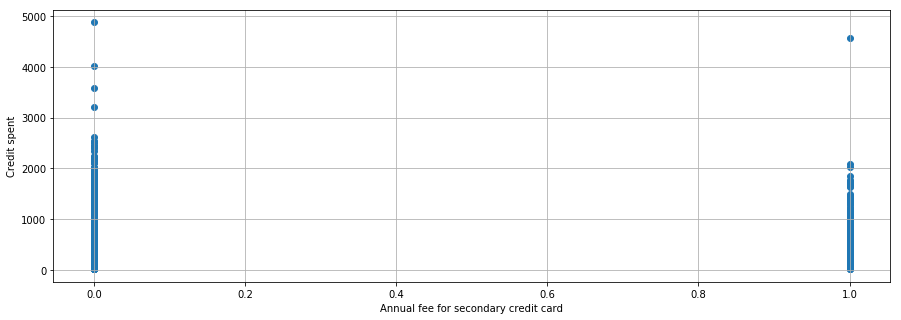

In [1499]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2fee'],reqvar)
plt.xlabel('Annual fee for secondary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

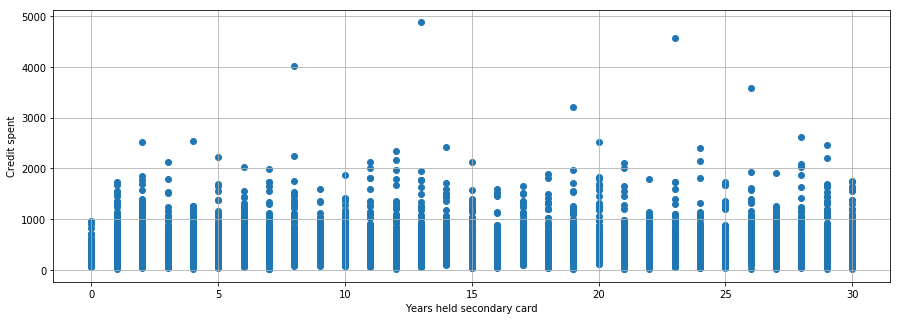

In [1500]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2tenure'],reqvar)
plt.xlabel('Years held secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

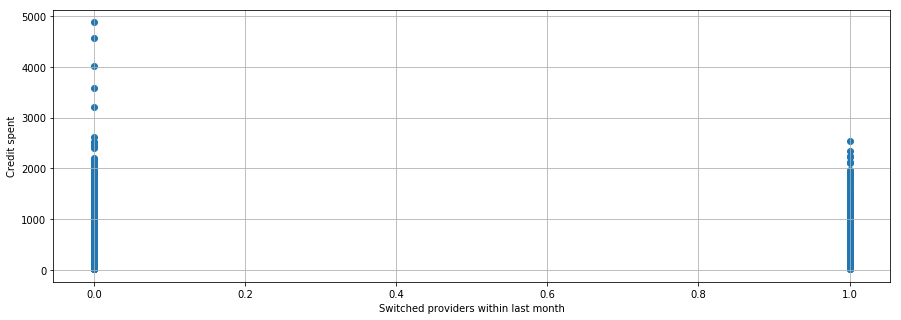

In [1501]:
plt.subplots(figsize=(15,5))
plt.scatter(data['churn'],reqvar)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

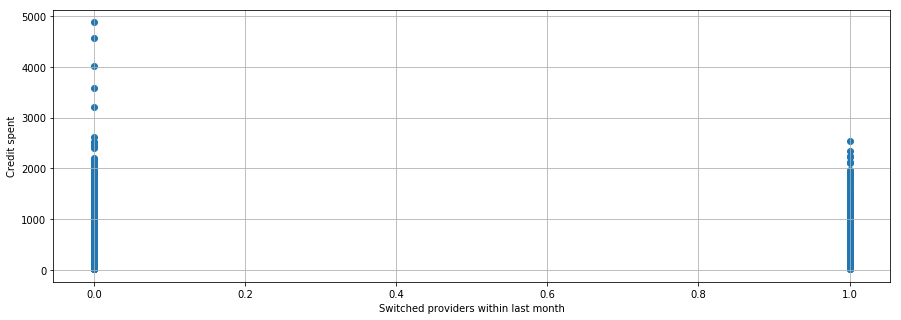

In [1502]:
plt.subplots(figsize=(15,5))
plt.scatter(data['churn'],reqvar)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

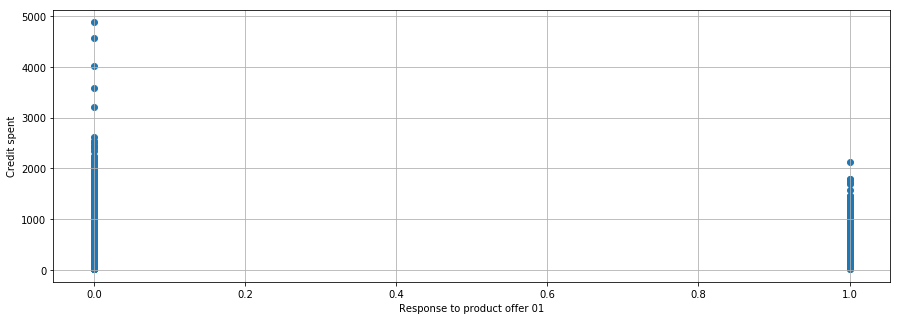

In [1503]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_01'],reqvar)
plt.xlabel('Response to product offer 01')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

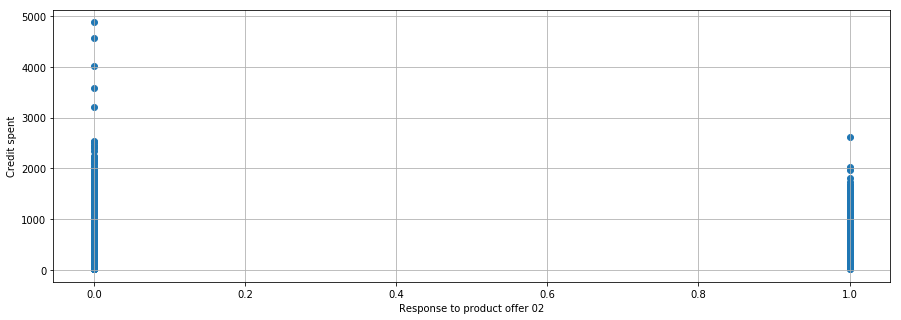

In [1504]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_02'],reqvar)
plt.xlabel('Response to product offer 02')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

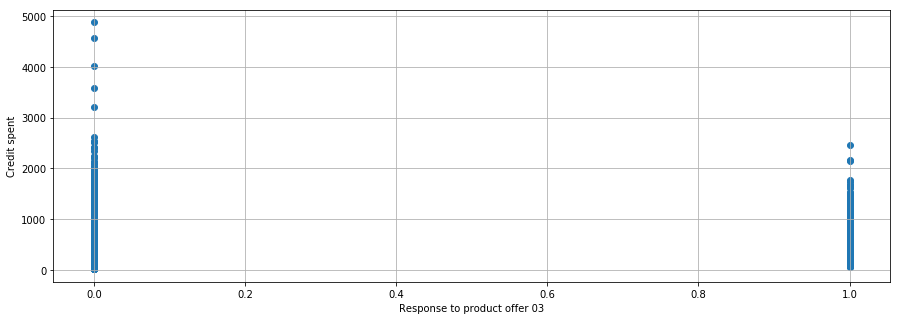

In [1505]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_03'],reqvar)
plt.xlabel('Response to product offer 03')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

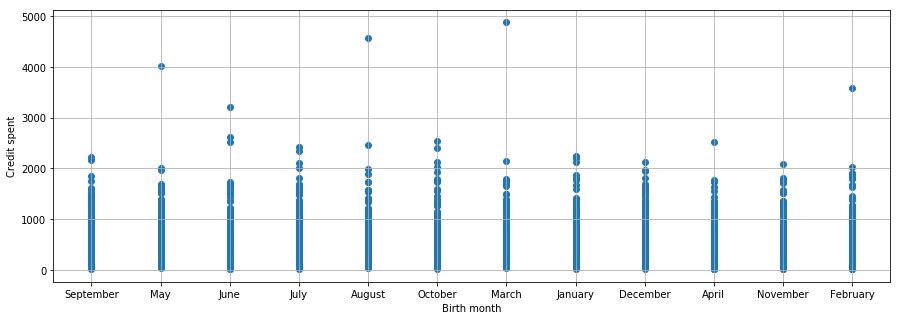

In [1506]:
plt.subplots(figsize=(15,5))
plt.scatter(data['birthmonth'],reqvar)
plt.xlabel('Birth month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

In [1]:
#Quantile Analysis

In [1508]:
q1=numvars.quantile(0.10)
numvars[numvars[q1.index]<q1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,438.0,19.942922,1.444292,18.000000,19.000000,20.000000,21.000000,22.000000
ed,324.0,8.404321,0.762987,6.000000,8.000000,9.000000,9.000000,9.000000
income,460.0,12.084783,2.154032,9.000000,10.000000,12.000000,14.000000,15.000000
lninc,460.0,2.475326,0.182825,2.200000,2.300000,2.480000,2.640000,2.710000
debtinc,478.0,1.735983,0.688847,0.100000,1.200000,1.900000,2.300000,2.700000
creddebt,496.0,0.097298,0.046262,0.000000,0.060000,0.100000,0.140000,0.170000
othdebt,497.0,0.276237,0.110937,0.020000,0.200000,0.290000,0.370000,0.450000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1509]:
q2=numvars.quantile(0.25)
numvars[numvars[q2.index]<q2].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1156.0,24.001730,3.748361,18.000000,21.000000,24.000000,27.000000,30.00000
ed,945.0,9.834921,1.195085,6.000000,9.000000,10.000000,11.000000,11.00000
income,1227.0,16.786471,4.279018,9.000000,14.000000,17.000000,20.000000,23.00000
lninc,1227.0,2.783366,0.280230,2.200000,2.640000,2.830000,3.000000,3.14000
debtinc,1249.0,3.134668,1.300600,0.100000,2.100000,3.200000,4.200000,5.10000
creddebt,1245.0,0.206129,0.105061,0.000000,0.120000,0.210000,0.290000,0.38000
othdebt,1240.0,0.546105,0.258963,0.020000,0.330000,0.550000,0.770000,0.97000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1510]:
q3=numvars.quantile(0.50)
numvars[numvars[q3.index]<q3].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2487.0,31.578207,8.237195,18.000000,25.000000,31.00000,38.000000,46.000000
ed,1940.0,11.218557,1.625501,6.000000,10.000000,12.00000,13.000000,13.000000
income,2447.0,23.443400,7.839245,9.000000,17.000000,23.00000,30.000000,37.000000
lninc,2447.0,3.090012,0.377552,2.200000,2.830000,3.14000,3.400000,3.610000
debtinc,2493.0,5.010951,2.215078,0.100000,3.200000,5.10000,6.900000,8.700000
creddebt,2494.0,0.423633,0.254705,0.000000,0.210000,0.39000,0.630000,0.920000
othdebt,2496.0,1.018862,0.551622,0.020000,0.560000,0.98000,1.460000,2.090000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,2034.0,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
pets,2306.0,0.337814,0.473068,0.000000,0.000000,0.00000,1.000000,1.000000


In [1511]:
q4=numvars.quantile(0.75)
numvars[numvars[q4.index]<q4].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3690.0,38.864770,12.710569,18.000000,28.000000,38.000000,50.000000,61.000000
ed,3530.0,12.898300,2.278840,6.000000,11.000000,13.000000,15.000000,16.000000
income,3744.0,32.653579,14.959717,9.000000,21.000000,30.000000,43.250000,66.000000
lninc,3744.0,3.370230,0.500645,2.200000,3.040000,3.400000,3.765000,4.190000
debtinc,3742.0,6.987493,3.413311,0.100000,4.200000,6.900000,9.800000,13.500000
creddebt,3742.0,0.747910,0.536107,0.000000,0.300000,0.630000,1.120000,2.050000
othdebt,3743.0,1.692252,1.111607,0.020000,0.770000,1.460000,2.510000,4.300000
spoused,3721.0,2.622951,5.592862,-1.000000,-1.000000,-1.000000,9.000000,13.000000
reside,3498.0,1.418525,0.493388,1.000000,1.000000,1.000000,2.000000,2.000000
pets,3552.0,1.186655,1.305195,0.000000,0.000000,1.000000,2.000000,4.000000


In [1512]:
#Feature Selection

In [1513]:
catvars=data[catvars].join(reqvar)
catvars=catvars.loc[df.index]
catvars.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
4459-VLPQUH-3OL,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
9124-DZALHM-S6I,2.0,3.00,1.0,6.0,October,2.0,1.0,0.0,15.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,467.83
3512-MUWBGY-52X,2.0,2.00,0.0,4.0,July,1.0,6.0,0.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.81
8241-PWPONH-62O,2.0,4.00,1.0,3.0,October,1.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393.43
1705-NMIQNO-IC4,3.0,2.00,0.0,5.0,January,4.0,1.0,0.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,978.44


In [1514]:
final_cat=list()
for i in catvars:
    if type(catvars[i][0])!=str:
        f=stats.f_oneway(catvars[i],catvars.reqvar)
        if f.pvalue<=0.05:
            final_cat.append(i)

In [1515]:
final_num=list()
for i in df.columns:
    if i!='reqvar':
        f=stats.pearsonr(df[i],df.reqvar)
        if f[1]<=0.05:
            final_num.append(i)

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [1516]:
final_num

['ed',
 'income',
 'lninc',
 'creddebt',
 'othdebt',
 'carvalue',
 'carditems',
 'card2items']

In [1517]:
df=pd.DataFrame(df[final_num])
final_df=df.join(catvars[final_cat])

In [1518]:
#Modeling
x_train, x_test, y_train, y_test= train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [1519]:
model = xgboost.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


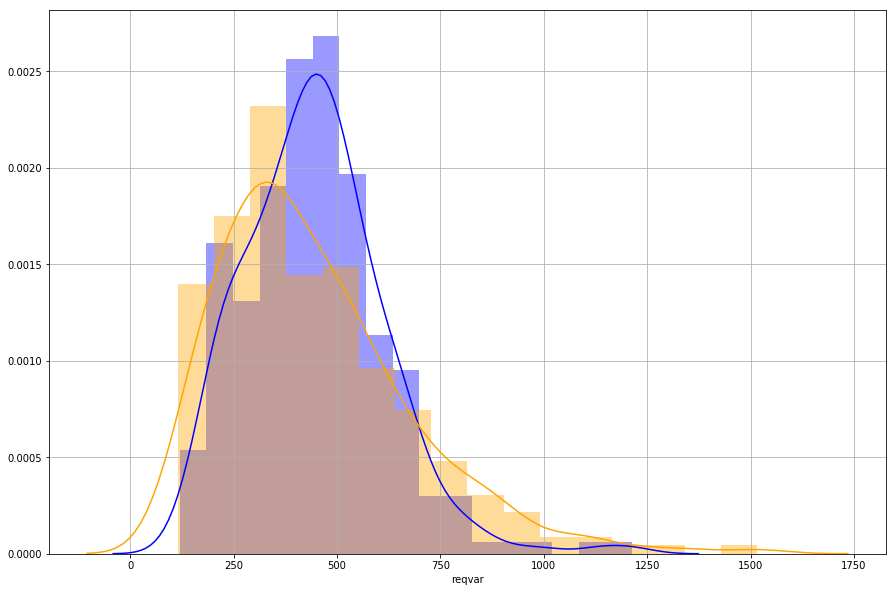

In [1520]:
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()

In [1521]:
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                 importance
carditems          0.110947
income             0.105030
card2items         0.087278
othdebt            0.065089
creddebt           0.062130
card               0.060651
carvalue           0.060651
ed                 0.038462
cardtenure         0.029586
card2              0.029586
reason             0.028107
address            0.028107
bfast              0.017751
employ             0.017751
cardbenefit        0.014793
jobcat             0.013314
card2tenure        0.013314
card2type          0.011834
commute            0.011834
voice              0.010355
hometype           0.010355
internet           0.010355
pager              0.008876
spousedcat         0.007396
region             0.007396
telecommute        0.007396
commuterail        0.007396
multline           0.007396
equip              0.005917
commutecar         0.005917
...                     ...
carown             0.001479
response_01        0.000000
lninc              0.000000
news               0

In [1522]:
#According to the mentioned importance, we can reduce the number of features to make the model better. Here, we remove features that have no or very little impact with regard to the model.

In [1523]:
final_df=final_df[["carditems","income","card2items","othdebt","creddebt","card","carvalue","ed","cardtenure","card2","reason","address","employ","card2tenure","card2type","commute","hometype","internet","multline"]]

In [1524]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [1525]:
model=xgboost.XGBRegressor()
model.fit(x_train,y_train)
#feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
y_pred=model.predict(x_test)
#print(feature_importances)

C:\Users\Hardik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Hardik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


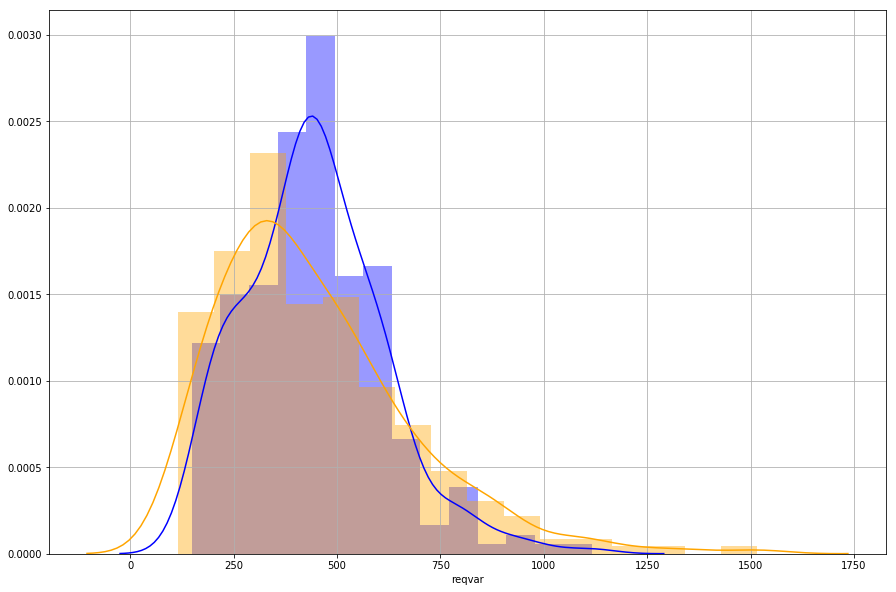

In [1526]:
y_pred=model.predict(x_test)
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()

# Conclusions concerning credit spend as derived from provided data:
** The observed might be otherwise in case of outliers but is in coherence with majority ** 

- Non-Union members spend a little more than Union members
- Retired customers tend to spend less
- Credit spent on cards decreases with increase in number of years of service with the same employer
- Customers with "High" Debt to income ratio (%) spent a lot less as compared to those with "low" Debt to income ratio (%)
- Customers with low credit card debt spent more as compared to those with high debt
- Customers with 13-17 years of education spend more on their credit cards as compared to those with less or more years of education
- Customers with less number of people in household tend to spend more, specially customers who were alone
- Customer with less number of cars tend to spend more
- Customers who were not being charged card fee were found to be spending more
- Customers who did not receive any product offers spend more as compared to those who received offers


** Factors that do not influence credit spend except in case of outliers:

- Income of the individual
- Job category of the individual
- Marital status of customers
- Political views (except highly conservative people who were found spending slightly less than others)
- Birth month